<b><font size='6'>Assignment 7<br>Log Analysis with Elasticsearch (Extension)</font></b>

**BDT ILV bds19: Big Data Technologien ILV**  
**Data Science & Business Analytics**

Author: Thomas Schrittwieser, DS191004  
Date: 2020-12-26

# Tasks
* Visualize the number of log entries over time for Germany and Austria
* Visualize the frequency of requested product groups for Germany and Austria

---

In [1]:
import numpy as np
import pandas as pd
import requests
import datetime as dt
import matplotlib.pyplot as plt

# matplotlib styles
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# url & parameters for url-query
country = ['AT', 'DE']
url = 'http://localhost:9200/logstash-2020.12.21-000001/_search?'
size = 1000

In [3]:
# create dataframe with log-entries
hits = []

for i in country:
    search_string = 'q=geoip.country_code2:' + i
    url1 = url + search_string + '&size=' + str(size)
    results = requests.get(url1).json()
    hits += results['hits']['hits']

df = pd.json_normalize(hits)

In [4]:
# count country-specific log-entries
log_entries_cnt = df.groupby(by='_source.geoip.country_code2').count()['_id'].to_frame()
log_entries_cnt.index.name = 'Country'
log_entries_cnt.rename(columns={'_id': 'Log-Entries'})

,Log-Entries
Country,
AT,116
DE,428


In [5]:
df.head()

,_index,_type,_id,_score,_source.geoip.latitude,_source.geoip.city_name,_source.geoip.location.lon,_source.geoip.location.lat,_source.geoip.longitude,_source.geoip.ip,...,_source.@timestamp,_source.clientip,_source.@version,_source.timestamp,_source.referrer,_source.httpversion,_source.host,_source.verb,_source.ident,_source.agent
0,logstash-2020.12.21-000001,_doc,GnSig3YB5hT7m9Q1kVYw,4.955525,48.2994,Vienna,16.3479,48.2994,16.3479,80.108.152.31,...,2020-12-21T01:13:20.000Z,80.108.152.31,1,21/Dec/2020:01:13:20 +0000,"""http://www.google.com/search?ie=UTF-8&q=googl...",1.1,ip-172-31-44-52,GET,-,"""Mozilla/5.0 (compatible; MSIE 9.0; Windows NT..."
1,logstash-2020.12.21-000001,_doc,oXSig3YB5hT7m9Q1lmQb,4.955525,48.2000,NaN,16.3667,48.2000,16.3667,212.33.57.137,...,2020-12-21T06:11:10.000Z,212.33.57.137,1,21/Dec/2020:06:11:10 +0000,"""-""",1.1,ip-172-31-44-52,GET,-,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK..."
2,logstash-2020.12.21-000001,_doc,GnSig3YB5hT7m9Q1lmVf,4.955525,47.0333,Serfaus,10.6000,47.0333,10.6000,80.120.85.145,...,2020-12-21T06:21:15.000Z,80.120.85.145,1,21/Dec/2020:06:21:15 +0000,"""/item/electronics/7""",1.1,ip-172-31-44-52,GET,-,"""Mozilla/4.0 (compatible; MSIE 8.0; Windows NT..."
3,logstash-2020.12.21-000001,_doc,8nSig3YB5hT7m9Q1lmbt,4.955525,48.2000,NaN,16.3667,48.2000,16.3667,212.33.57.137,...,2020-12-21T07:31:50.000Z,212.33.57.137,1,21/Dec/2020:07:31:50 +0000,"""-""",1.1,ip-172-31-44-52,GET,-,"""Mozilla/5.0 (compatible; MSIE 9.0; Windows NT..."
4,logstash-2020.12.21-000001,_doc,PnSig3YB5hT7m9Q1l2qA,4.955525,48.1865,Vienna,16.3549,48.1865,16.3549,80.108.98.67,...,2020-12-21T08:10:55.000Z,80.108.98.67,1,21/Dec/2020:08:10:55 +0000,"""-""",1.1,ip-172-31-44-52,GET,-,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; ..."


In [6]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _index                        544 non-null    object 
 1   _type                         544 non-null    object 
 2   _id                           544 non-null    object 
 3   _score                        544 non-null    float64
 4   _source.geoip.latitude        544 non-null    float64
 5   _source.geoip.city_name       341 non-null    object 
 6   _source.geoip.location.lon    544 non-null    float64
 7   _source.geoip.location.lat    544 non-null    float64
 8   _source.geoip.longitude       544 non-null    float64
 9   _source.geoip.ip              544 non-null    object 
 10  _source.geoip.postal_code     341 non-null    object 
 11  _source.geoip.country_name    544 non-null    object 
 12  _source.geoip.country_code2   544 non-null    object 
 13  _sour

In [7]:
# identify get and post requests
def get_post_req(x):
    if '"GET' in x:
        x1 = 'GET'
    elif '"POST' in x:
        x1 = 'POST'
    return x1

In [8]:
# create new feature with the request-type
df['get_post_request'] = df['_source.message'].apply(get_post_req)

In [9]:
# constrain the dataframe to essential features
features = ['_source.@timestamp', '_source.geoip.country_code2', '_source.request', 'get_post_request']
df = df[features]

In [10]:
# get hour of the log-entry
def stunde(x):
    return x.hour

In [11]:
# get the product_group uf the log-entry
def prod_group(x):
    if '/search/' in x:
        x1 = x.split('?c=')[1]
    else:
        x1 = x.split('/')[2]
        
    if '?from' in x1:
        x1 = x1.split('?from')[0]
    return x1

In [12]:
df.reset_index(inplace=True)

In [13]:
# create feature 'product_group'
df['product_group'] = df['_source.request'].apply(prod_group)

# split search-string from post-requests
df=df.set_index('index').apply(lambda x: x.str.split('+').explode()).reset_index()

# capitalize product_group
df['product_group'] = df['product_group'].str.capitalize()
df['product_group'].unique()

array(['Games', 'Software', 'Electronics', 'Toys', 'Health', 'Giftcards',
       'Office', 'Computers', 'Garden', 'Jewelry', 'Cameras', 'Books',
       'Finance', 'Networking', 'Sports', 'Music'], dtype=object)

In [14]:
# create feature timestamp and drop the original timestamp
df['timestamp'] = pd.to_datetime(df['_source.@timestamp'])

In [15]:
# create feature 'hour' of the log-entry
df['hour'] = df['timestamp'].apply(stunde)

In [16]:
# rename feature
feature_rename = {'_source.geoip.country_code2' : 'country'}
df.rename(columns=feature_rename, inplace=True)

In [17]:
drop_feature_list = ['index', '_source.@timestamp', '_source.request']
df.drop(drop_feature_list, axis=1, inplace=True)

In [18]:
df.head()

,country,get_post_request,product_group,timestamp,hour
0,AT,GET,Games,2020-12-21 01:13:20+00:00,1
1,AT,GET,Software,2020-12-21 06:11:10+00:00,6
2,AT,GET,Electronics,2020-12-21 06:21:15+00:00,6
3,AT,GET,Games,2020-12-21 07:31:50+00:00,7
4,AT,GET,Games,2020-12-21 08:10:55+00:00,8


In [19]:
df.shape

(571, 5)

# Visualizations

## Hits per hour

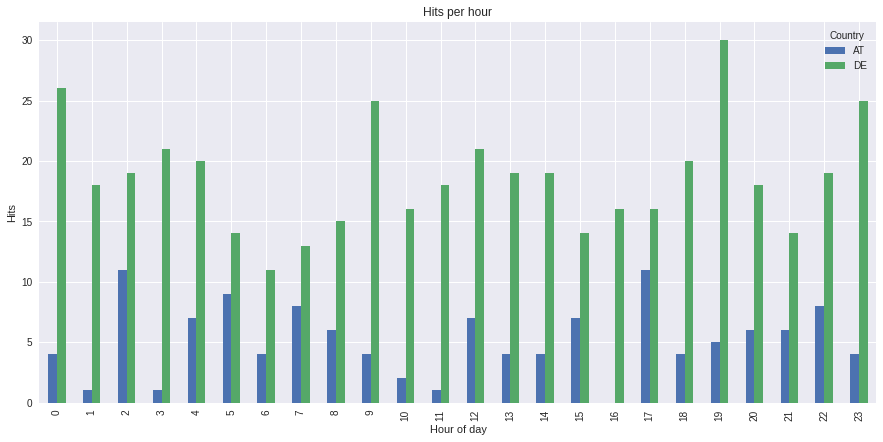

In [20]:
# visualization of get-requests per hour
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['hour','country']).count()['timestamp'].unstack().plot.bar(ax=ax)
ax.set_title('Hits per hour')
ax.set_xlabel('Hour of day')
ax.set_ylabel('Hits')
ax.set_xticks(np.arange(24))
ax.legend(loc = 'best', title = 'Country');

## Hits per product-group

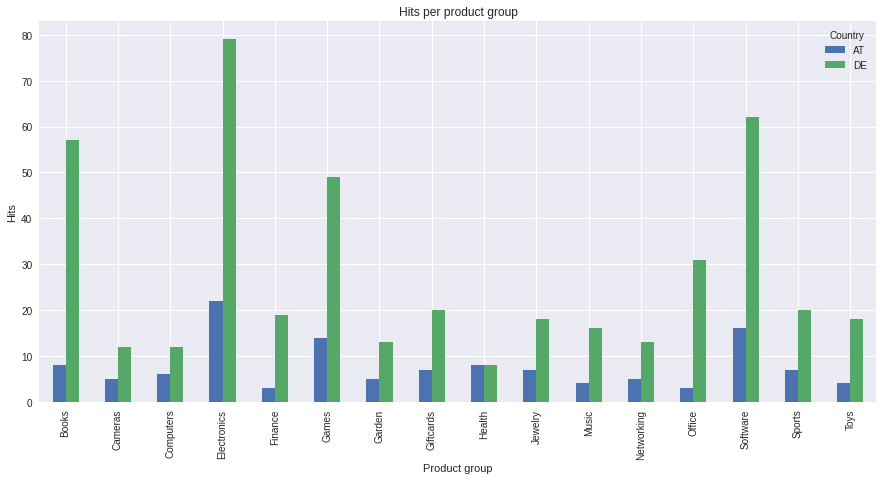

In [21]:
# visualization of get-requests per product-group
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['product_group', 'country']).count()['timestamp'].unstack().plot.bar(ax=ax)
ax.set_title('Hits per product group')
ax.set_xlabel('Product group')
ax.set_ylabel('Hits')
ax.legend(loc = 'best', title = 'Country');

## Hits per product-group and hour

In [22]:
# create dataframe with number of requests per product group and hour
df_group_hour = df.groupby(['hour','product_group']).count()['timestamp'].unstack()

# fill na-values with 0
df_group_hour = df_group_hour.fillna(0)

# number of max requests
y_max = df_group_hour.max().max()

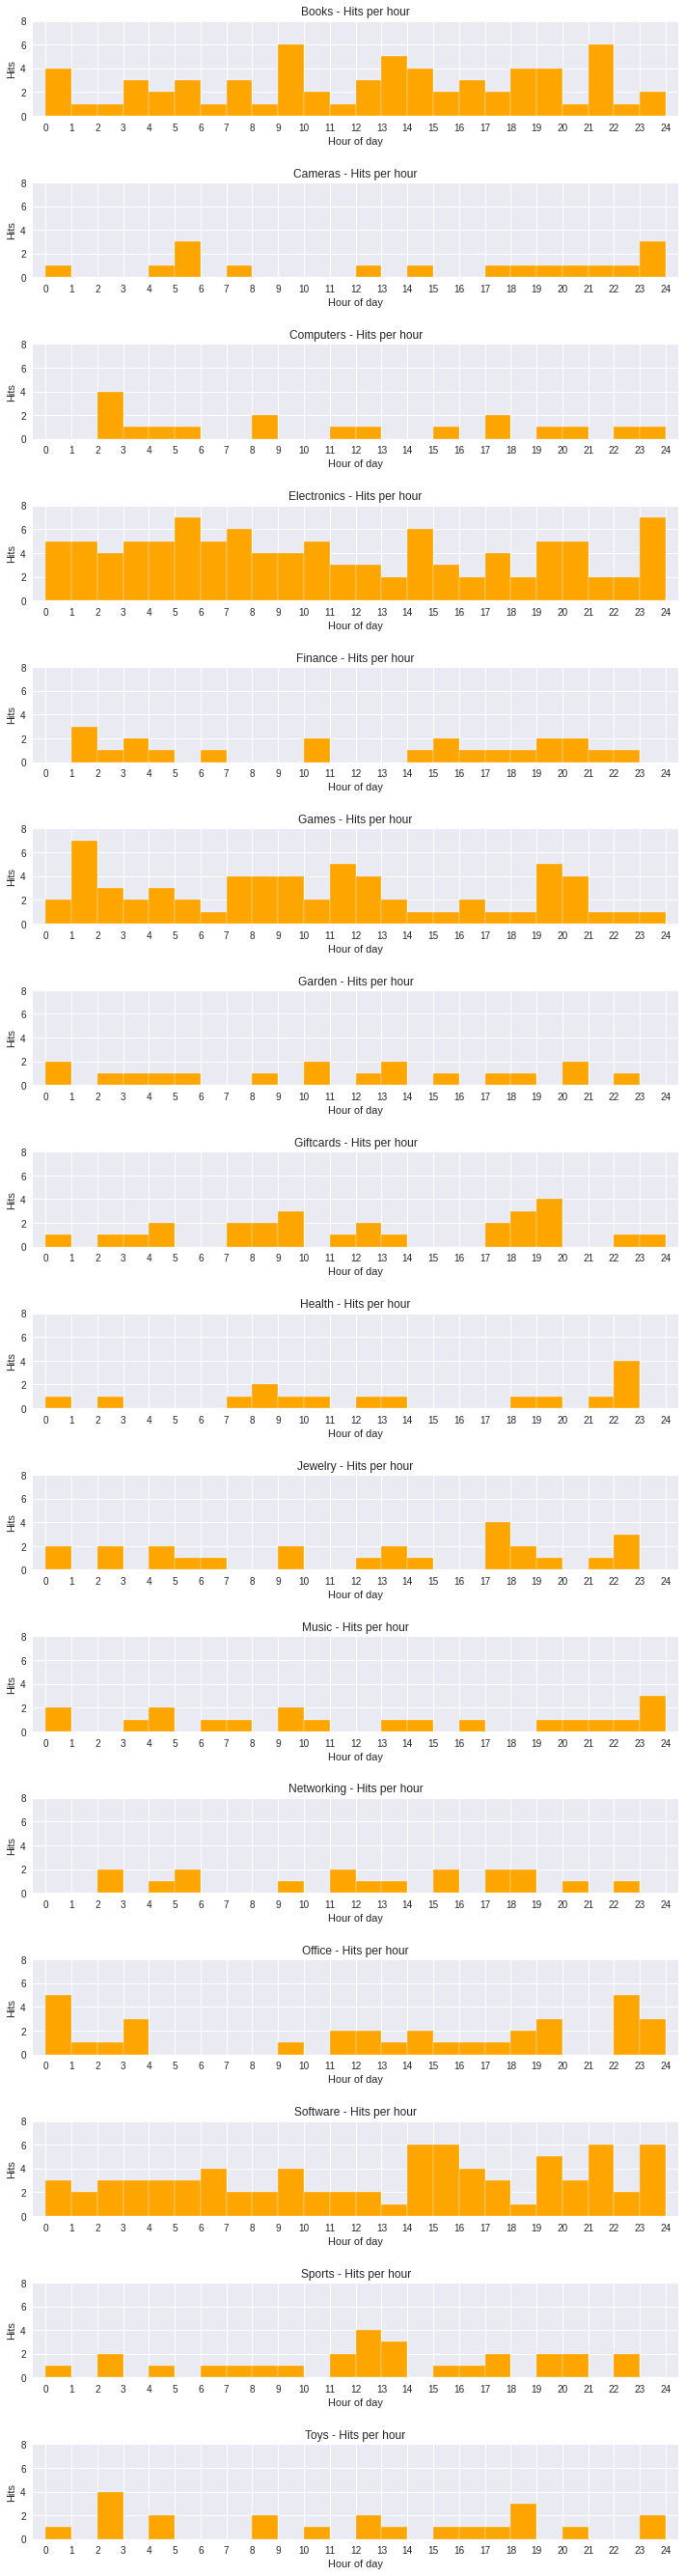

In [23]:
#  visualization of get-Requests per product-group and hour
fig, ax = plt.subplots(len(df_group_hour.columns), 1 , figsize=(12, 48))

for group in enumerate(df_group_hour.columns):
    plot_idx = group[0]
    data_idx = group[1]
    y = df_group_hour[data_idx]
    x = np.arange(24)
    ax[plot_idx].bar(x, y, align='edge', width=1, edgecolor='white', color='orange')#, width=barWidth)
    ax[plot_idx].set_title(f'{data_idx} - Hits per hour')
    ax[plot_idx].set_xlabel('Hour of day')
    ax[plot_idx].set_ylabel('Hits')
    ax[plot_idx].set_xticks(np.arange(25))
    ax[plot_idx].set_ylim(0, y_max+1)
    ax[plot_idx].set_xlim(-0.5, 24.5)
    fig.subplots_adjust(hspace=0.7);